<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M4_1_ann_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we look at why neural networks work, it’s important to understand what neural networks do. 

1. First, a weight is being applied to each input to an artificial neuron. 
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum. 
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

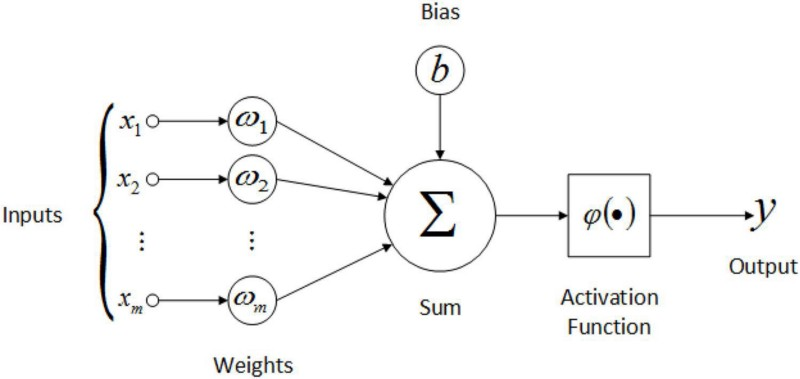

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent. 

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

In order to build a neural network, the following steps must be followed:

1. Creating a FeedForwardNetwork
2. FeedForward Evaluation
3. Backward / Gradient Calculation
4. Back Propagation
5. Training

In [ ]:
# import necessary libraries
import numpy as np  # Matrix and vector computation package
import pandas as pd
import matplotlib.pyplot as plt  # Plotting library

In [ ]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')

In [ ]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
# Define a function f that represents the line that generates y_pred 
# w = 1
def f(x): 
    return x * 1

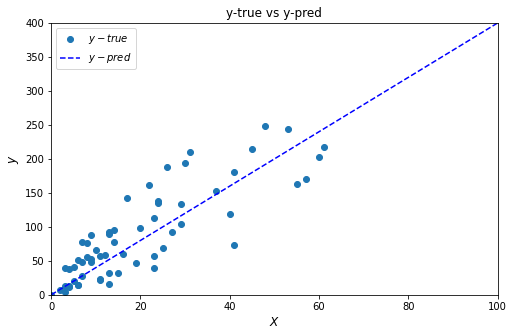

In [ ]:
# Plot the target y_true versus the input x
plt.figure(figsize=(8, 5))
plt.plot(data.X, data.Y, 'o', label='$y-true$')
# Plot the initial line
plt.plot([0, 100], [f(0), f(400)], 'b--', label='$y-pred$')
plt.xlabel('$X$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.axis((0, 100, 0, 400))
plt.title('y-true vs y-pred')
plt.legend(loc=2)
plt.show()

In [ ]:
def nn(x, w):
    """Output function y = x * w"""
    return x * w


def loss(y, t):
    """MSE loss function"""
    return np.mean((t - y)**2)

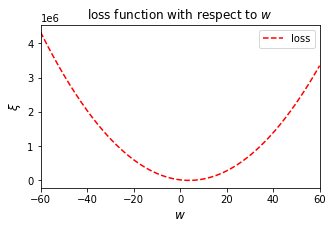

In [ ]:
# Plot the loss vs the given weight w

# Vector of weights for which we want to plot the loss
ws = np.linspace(-60, 60, num=1000)  # weight values
# loss for each weight in ws
loss_ws = np.vectorize(lambda w: loss(nn(data.X, w) , data.Y))(ws)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss function with respect to $w$')
plt.xlim(-60, 60)
plt.legend()
plt.show()

In [ ]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))


# Initial weight parameter
w = 50

# Set the learning rate
learning_rate = 0.2

# Perform the gradient descent updates, and print the weights and loss:
nb_of_iterations = 4  # number of gradient descent updates
w_loss = [(w, loss(nn(data.X, w), data.Y))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Delta w update
    w = w - dw  # Update the current weight parameter
    w_loss.append((w, loss(nn(data.X, w), data.Y)))  # Save weight and loss

# Print the final w, and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 50.0000 	 loss: 2262258.9730
w(1): 41.9627 	 loss: 1543432.7850
w(2): 35.2408 	 loss: 1047538.2524
w(3): 29.6190 	 loss: 706447.7007
w(4): 24.9173 	 loss: 472692.8991


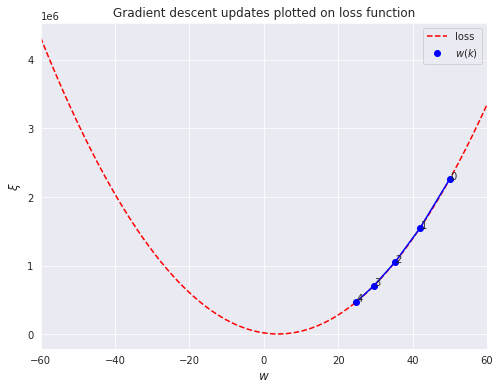

In [ ]:
# Visualise the gradient descent updates
plt.figure(figsize=(8, 6))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(-60, 60)
plt.legend(loc=1)
plt.show()

In [ ]:
# x = array([0.65403487, 0.85389164, 0.53178937, 0.81352089, 0.62228976,
#        0.33683447, 0.19372376, 0.3748394 , 0.27859951, 0.9020029 ,
#        0.7947775 , 0.70573101, 0.23068875, 0.30370117, 0.89978267,
#        0.09009608, 0.48594549, 0.92381176, 0.77267424, 0.85554407])

In [ ]:
# t = array([0.66575542, 0.81951233, 0.57685137, 0.83074219, 0.55833558,
#        0.46161105, 0.17953818, 0.11178532, 0.03673707, 0.50716876,
#        0.63457513, 0.55134597, 0.26157625, 0.42902436, 0.76023909,
#        0.37223679, 0.49550496, 0.8104272 , 0.8346828 , 0.79743347])